In [38]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini",temperature=0)

In [4]:
class QuarterlyFinanceData(BaseModel):
    quarter: str
    revenue_billion_usd: float
    net_income_billion_usd: float

In [5]:

# And a query intented to prompt a language model to populate the data structure.
query = "Tell me the profit and revenue for apple for all quarters of 2001 and 2002."

# Set up a parser + inject instructions into the prompt template.
parser = JsonOutputParser(pydantic_object=QuarterlyFinanceData)

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | model | parser


In [6]:
result=chain.invoke({"query": query})

In [7]:
result

[{'quarter': 'Q1 2001',
  'revenue_billion_usd': 5.36,
  'net_income_billion_usd': 0.07},
 {'quarter': 'Q2 2001',
  'revenue_billion_usd': 5.51,
  'net_income_billion_usd': 0.12},
 {'quarter': 'Q3 2001',
  'revenue_billion_usd': 5.34,
  'net_income_billion_usd': 0.01},
 {'quarter': 'Q4 2001',
  'revenue_billion_usd': 6.52,
  'net_income_billion_usd': 0.07},
 {'quarter': 'Q1 2002',
  'revenue_billion_usd': 7.25,
  'net_income_billion_usd': 0.18},
 {'quarter': 'Q2 2002',
  'revenue_billion_usd': 7.25,
  'net_income_billion_usd': 0.19},
 {'quarter': 'Q3 2002',
  'revenue_billion_usd': 6.66,
  'net_income_billion_usd': 0.14},
 {'quarter': 'Q4 2002',
  'revenue_billion_usd': 8.78,
  'net_income_billion_usd': 0.25}]

In [8]:
import pandas as pd
df = pd.DataFrame(result)


In [9]:
df

,quarter,revenue_billion_usd,net_income_billion_usd
0,Q1 2001,5.36,0.07
1,Q2 2001,5.51,0.12
2,Q3 2001,5.34,0.01
3,Q4 2001,6.52,0.07
4,Q1 2002,7.25,0.18
5,Q2 2002,7.25,0.19
6,Q3 2002,6.66,0.14
7,Q4 2002,8.78,0.25


In [10]:
# Extracting the 'revenue_billion_usd' column
revenue = df['revenue_billion_usd']
print(revenue)


0    5.36
1    5.51
2    5.34
3    6.52
4    7.25
5    7.25
6    6.66
7    8.78
Name: revenue_billion_usd, dtype: float64


In [11]:
# Extracting the first row
first_row = df.iloc[0]
print(first_row)


quarter                   Q1 2001
revenue_billion_usd          5.36
net_income_billion_usd       0.07
Name: 0, dtype: object


In [12]:
# Filter rows where revenue is greater than 6 billion USD
filtered_df = df[df['revenue_billion_usd'] > 6]
print(filtered_df)


   quarter  revenue_billion_usd  net_income_billion_usd
3  Q4 2001                 6.52                    0.07
4  Q1 2002                 7.25                    0.18
5  Q2 2002                 7.25                    0.19
6  Q3 2002                 6.66                    0.14
7  Q4 2002                 8.78                    0.25


In [13]:
# Extract the 'net_income_billion_usd' for 'Q2 2002'
net_income_q2_2002 = df.loc[df['quarter'] == 'Q2 2002', 'net_income_billion_usd'].iloc[0]
print(net_income_q2_2002)


0.19


In [14]:
# Extract the first three rows
first_three_rows = df.iloc[:3]
print(first_three_rows)

# Extract the 'quarter' and 'revenue_billion_usd' columns for the first three rows
first_three_revenue = df.iloc[:3][['quarter', 'revenue_billion_usd']]
print(first_three_revenue)


   quarter  revenue_billion_usd  net_income_billion_usd
0  Q1 2001                 5.36                    0.07
1  Q2 2001                 5.51                    0.12
2  Q3 2001                 5.34                    0.01
   quarter  revenue_billion_usd
0  Q1 2001                 5.36
1  Q2 2001                 5.51
2  Q3 2001                 5.34


In [15]:
# Group by year (assuming the year is extracted into a separate column)
df['year'] = df['quarter'].str[-4:]
grouped = df.groupby('year').sum()
print(grouped)



                           quarter  revenue_billion_usd  \
year                                                      
2001  Q1 2001Q2 2001Q3 2001Q4 2001                22.73   
2002  Q1 2002Q2 2002Q3 2002Q4 2002                29.94   

      net_income_billion_usd  
year                          
2001                    0.27  
2002                    0.76  


In [16]:

from tabulate import tabulate

# Convert the DataFrame to a tabular format using tabulate
print(tabulate(grouped, headers='keys', tablefmt='grid'))


+--------+------------------------------+-----------------------+--------------------------+
|   year | quarter                      |   revenue_billion_usd |   net_income_billion_usd |
+========+==============================+=======================+==========================+
|   2001 | Q1 2001Q2 2001Q3 2001Q4 2001 |                 22.73 |                     0.27 |
+--------+------------------------------+-----------------------+--------------------------+
|   2002 | Q1 2002Q2 2002Q3 2002Q4 2002 |                 29.94 |                     0.76 |
+--------+------------------------------+-----------------------+--------------------------+


In [17]:
summary = df.describe()
print(summary)


       revenue_billion_usd  net_income_billion_usd
count             8.000000                8.000000
mean              6.583750                0.128750
std               1.190353                0.077724
min               5.340000                0.010000
25%               5.472500                0.070000
50%               6.590000                0.130000
75%               7.250000                0.182500
max               8.780000                0.250000


In [18]:
# Calculate mean revenue
mean_revenue = df['revenue_billion_usd'].mean()
print(f"Mean Revenue: {mean_revenue} billion USD")


Mean Revenue: 6.58375 billion USD


In [19]:
import numpy as np

# Assuming we have weights for each quarter
weights = [1, 1, 1, 1, 2, 2, 2, 2]

# Calculate weighted mean for revenue
weighted_mean_revenue = np.average(df['revenue_billion_usd'], weights=weights)
print(f"Weighted Mean Revenue: {weighted_mean_revenue} billion USD")


Weighted Mean Revenue: 6.884166666666666 billion USD


In [20]:
# Calculate median net income
median_net_income = df['net_income_billion_usd'].median()
print(f"Median Net Income: {median_net_income} billion USD")


Median Net Income: 0.13 billion USD


In [21]:
import pandas as pd

# Assuming you have already grouped your data by year
df['year'] = df['quarter'].str[-4:]
grouped = df.groupby('year').sum()

# Print the grouped DataFrame in a tabular format
print(grouped)


                           quarter  revenue_billion_usd  \
year                                                      
2001  Q1 2001Q2 2001Q3 2001Q4 2001                22.73   
2002  Q1 2002Q2 2002Q3 2002Q4 2002                29.94   

      net_income_billion_usd  
year                          
2001                    0.27  
2002                    0.76  


In [22]:
!pip install prettytable



In [23]:
from tabulate import tabulate

# Convert the DataFrame to a tabular format using tabulate
print(tabulate(grouped, headers='keys', tablefmt='grid'))


+--------+------------------------------+-----------------------+--------------------------+
|   year | quarter                      |   revenue_billion_usd |   net_income_billion_usd |
+========+==============================+=======================+==========================+
|   2001 | Q1 2001Q2 2001Q3 2001Q4 2001 |                 22.73 |                     0.27 |
+--------+------------------------------+-----------------------+--------------------------+
|   2002 | Q1 2002Q2 2002Q3 2002Q4 2002 |                 29.94 |                     0.76 |
+--------+------------------------------+-----------------------+--------------------------+


In [24]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.field_names = grouped.columns.tolist()

# Add rows
for row in grouped.itertuples():
    table.add_row(row[1:])

print(table)


+------------------------------+---------------------+------------------------+
|           quarter            | revenue_billion_usd | net_income_billion_usd |
+------------------------------+---------------------+------------------------+
| Q1 2001Q2 2001Q3 2001Q4 2001 |        22.73        |          0.27          |
| Q1 2002Q2 2002Q3 2002Q4 2002 |  29.939999999999998 |          0.76          |
+------------------------------+---------------------+------------------------+


In [26]:
! pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Extract year and quarter for better analysis
df['year'] = df['quarter'].str[-4:]
df['quarter_num'] = df['quarter'].str[:2]

# Convert year to integer for easier plotting
df['year'] = df['year'].astype(int)

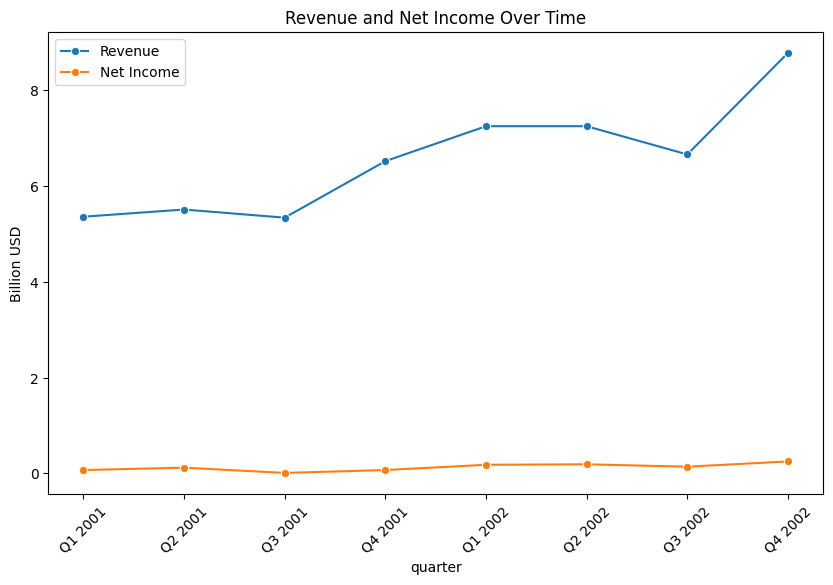

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='revenue_billion_usd', data=df, marker='o', label='Revenue')
sns.lineplot(x='quarter', y='net_income_billion_usd', data=df, marker='o', label='Net Income')
plt.title('Revenue and Net Income Over Time')
plt.xticks(rotation=45)
plt.ylabel('Billion USD')
plt.legend()
plt.show()


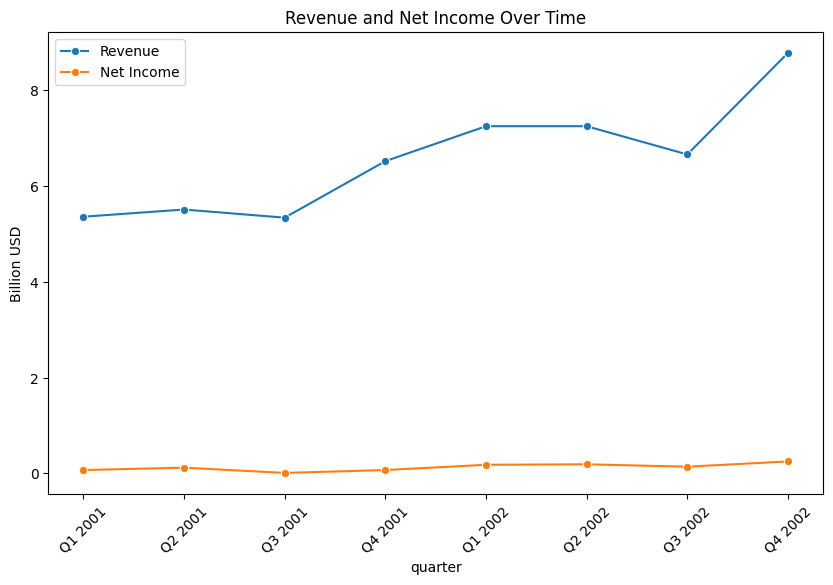

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='revenue_billion_usd', data=df, marker='o', label='Revenue')
sns.lineplot(x='quarter', y='net_income_billion_usd', data=df, marker='o', label='Net Income')
plt.title('Revenue and Net Income Over Time')
plt.xticks(rotation=45)
plt.ylabel('Billion USD')
plt.legend()
plt.show()


C:\Users\neural_ninja\AppData\Local\Temp\ipykernel_9648\3104476008.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='revenue_billion_usd', data=df, estimator=sum, ci=None, label='Revenue')
C:\Users\neural_ninja\AppData\Local\Temp\ipykernel_9648\3104476008.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='net_income_billion_usd', data=df, estimator=sum, ci=None, label='Net Income')


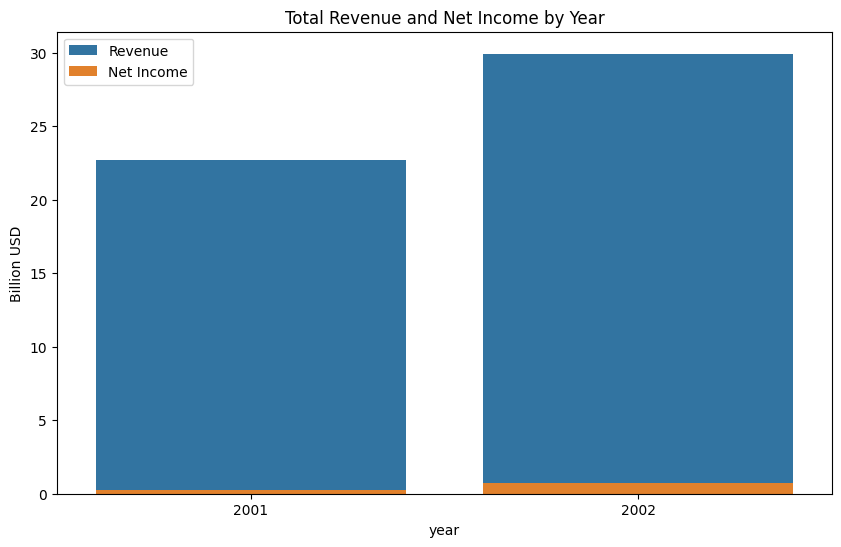

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='revenue_billion_usd', data=df, estimator=sum, ci=None, label='Revenue')
sns.barplot(x='year', y='net_income_billion_usd', data=df, estimator=sum, ci=None, label='Net Income')
plt.title('Total Revenue and Net Income by Year')
plt.ylabel('Billion USD')
plt.legend()
plt.show()


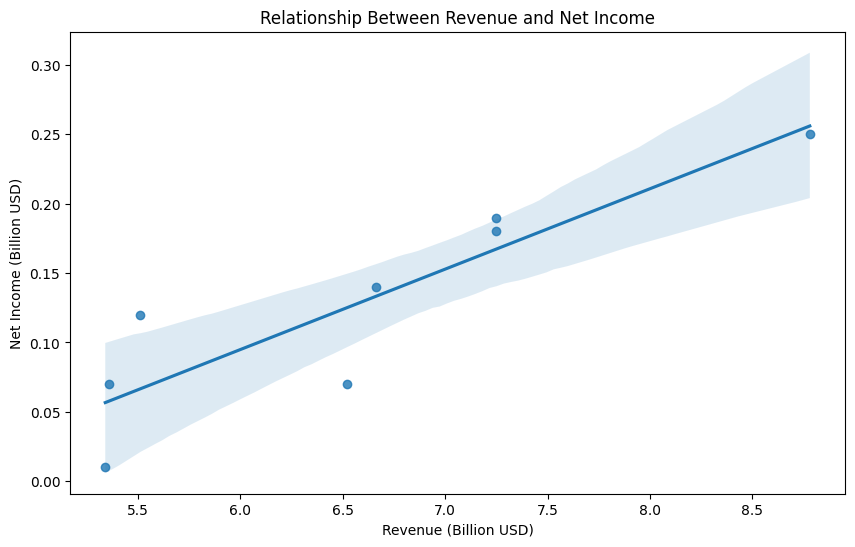

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='revenue_billion_usd', y='net_income_billion_usd', data=df, marker='o')
plt.title('Relationship Between Revenue and Net Income')
plt.xlabel('Revenue (Billion USD)')
plt.ylabel('Net Income (Billion USD)')
plt.show()


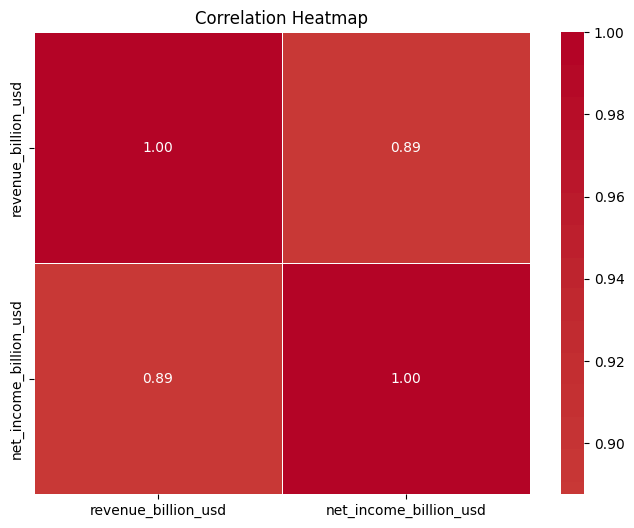

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df[['revenue_billion_usd', 'net_income_billion_usd']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# Pivot data for heatmap
pivot_revenue = df.pivot("quarter_num", "year", "revenue_billion_usd")
pivot_income = df.pivot("quarter_num", "year", "net_income_billion_usd")

# Create heatmap for revenue
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_revenue, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Revenue Heatmap by Year and Quarter')
plt.ylabel('Quarter')
plt.xlabel('Year')
plt.show()

# Create heatmap for net income
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_income, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Net Income Heatmap by Year and Quarter')
plt.ylabel('Quarter')
plt.xlabel('Year')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [37]:
# Pivot data for heatmap
pivot_revenue = df.pivot("quarter_num", "year", "revenue_billion_usd")
pivot_income = df.pivot("quarter_num", "year", "net_income_billion_usd")

# Create heatmap for revenue
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_revenue, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Revenue Heatmap by Year and Quarter')
plt.ylabel('Quarter')
plt.xlabel('Year')
plt.show()

# Create heatmap for net income
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_income, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Net Income Heatmap by Year and Quarter')
plt.ylabel('Quarter')
plt.xlabel('Year')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given